<h1> Adjusting the learning rate </h1>

As $\alpha = 0.00001$ worked pretty well, but 0.0001 also shows quite a good shape regarding the loss function I'd like to try $\alpha=0.00005$. 

In [1]:
import myfunctions as mf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
from scipy.optimize import curve_fit
import time
import random

In [2]:
# load data
rootfile = uproot.open("./stage1_clusters_bigdata.root")
event = rootfile["user202302;1"]
xMC = event["x_MC"].array(library="np") #[:40000]
yMC = event["y_MC"].array(library="np") #[:40000]
EMC = event["E_MC"].array(library="np") #[:40000]
x_truth = event["x_truth"].array(library="np") #[:40000]
y_truth = event["y_truth"].array(library="np") #[:40000]
E_truth = event["E_truth"].array(library="np") #[:40000]
x_fit = event["x_fit"].array(library="np") #[:40000]
y_fit = event["y_fit"].array(library="np") #[:40000]
E_fit = event["E_fit"].array(library="np") #[:40000]

In [3]:
clusters5x5, coord, ind_del = mf.form_cluster(xMC, yMC, EMC)
clusters = clusters5x5.reshape((clusters5x5.shape[0], 25))

This took  150.48281502723694 s


In [4]:
# cut data and from trainings and test data
xMC_train, xMC_veri, yMC_train, yMC_veri, EMC_train, EMC_veri, x_truth_train, x_truth_veri, y_truth_train, y_truth_veri, E_truth_train, E_truth_veri, x_fit_veri, y_fit_veri, E_fit_veri, clusters_t, clusters_v, coord_t, coord_v = mf.training_and_validation_data(xMC, yMC, EMC, x_truth, y_truth, E_truth, x_fit, y_fit, E_fit, ind_del, clusters, coord)

In [5]:
# prep data
training = mf.prep_trainingsdata(x_truth_train, y_truth_train, E_truth_train, coord_t)
veri_truth_data = mf.prep_trainingsdata(x_truth_veri, y_truth_veri, E_truth_veri, coord_v)
veri_fit_data = mf.prep_trainingsdata(x_fit_veri, y_fit_veri, E_fit_veri, coord_v)

<h2> The network - $\alpha = 0.00005$ </h2>

As always:

In [6]:
model1 = keras.Sequential([layers.Input(shape=(25)),
                         layers.LayerNormalization(axis=1),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model1.summary()
model1.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00005))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization (LayerNo (None, 25)                50        
_________________________________________________________________
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2

In [7]:
a = time.time()
fit_hist = model1.fit(clusters_t, training, batch_size=50, epochs=200, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/200
10353/10353 [==============================] - 10s 893us/step - loss: 127.3883 - val_loss: 0.1010
Epoch 2/200
10353/10353 [==============================] - 9s 883us/step - loss: 0.0665 - val_loss: 0.0354
Epoch 3/200
10353/10353 [==============================] - 9s 882us/step - loss: 0.0321 - val_loss: 0.0211
Epoch 4/200
10353/10353 [==============================] - 9s 879us/step - loss: 0.0232 - val_loss: 0.0171
Epoch 5/200
10353/10353 [==============================] - 9s 884us/step - loss: 0.0192 - val_loss: 0.0143
Epoch 6/200
10353/10353 [==============================] - 9s 894us/step - loss: 0.0168 - val_loss: 0.0122
Epoch 7/200
10353/10353 [==============================] - 9s 910us/step - loss: 0.0151 - val_loss: 0.0125
Epoch 8/200
10353/10353 [==============================] - 9s 910us/step - loss: 0.0140 - val_loss: 0.0170
Epoch 9/200
10353/10353 [==============================] - 9s 879us/step - loss: 0.0129 - val_loss: 0.0101
Epoch 10/200
10353/10353 [========

Epoch 77/200
10353/10353 [==============================] - 9s 880us/step - loss: 0.0054 - val_loss: 0.0059
Epoch 78/200
10353/10353 [==============================] - 9s 880us/step - loss: 0.0054 - val_loss: 0.0058
Epoch 79/200
10353/10353 [==============================] - 9s 878us/step - loss: 0.0054 - val_loss: 0.0054
Epoch 80/200
10353/10353 [==============================] - 9s 877us/step - loss: 0.0053 - val_loss: 0.0036
Epoch 81/200
10353/10353 [==============================] - 9s 873us/step - loss: 0.0053 - val_loss: 0.0057
Epoch 82/200
10353/10353 [==============================] - 9s 878us/step - loss: 0.0053 - val_loss: 0.0037
Epoch 83/200
10353/10353 [==============================] - 9s 877us/step - loss: 0.0053 - val_loss: 0.0048
Epoch 84/200
10353/10353 [==============================] - 9s 875us/step - loss: 0.0053 - val_loss: 0.0050
Epoch 85/200
10353/10353 [==============================] - 9s 875us/step - loss: 0.0052 - val_loss: 0.0047
Epoch 86/200
10353/10353 [==

10353/10353 [==============================] - 9s 876us/step - loss: 0.0044 - val_loss: 0.0056
Epoch 153/200
10353/10353 [==============================] - 9s 875us/step - loss: 0.0044 - val_loss: 0.0033
Epoch 154/200
10353/10353 [==============================] - 9s 876us/step - loss: 0.0044 - val_loss: 0.0062
Epoch 155/200
10353/10353 [==============================] - 9s 879us/step - loss: 0.0044 - val_loss: 0.0045
Epoch 156/200
10353/10353 [==============================] - 9s 882us/step - loss: 0.0044 - val_loss: 0.0032
Epoch 157/200
10353/10353 [==============================] - 9s 879us/step - loss: 0.0043 - val_loss: 0.0033
Epoch 158/200
10353/10353 [==============================] - 9s 881us/step - loss: 0.0043 - val_loss: 0.0040
Epoch 159/200
10353/10353 [==============================] - 9s 875us/step - loss: 0.0043 - val_loss: 0.0039
Epoch 160/200
10353/10353 [==============================] - 9s 879us/step - loss: 0.0044 - val_loss: 0.0039
Epoch 161/200
10353/10353 [======

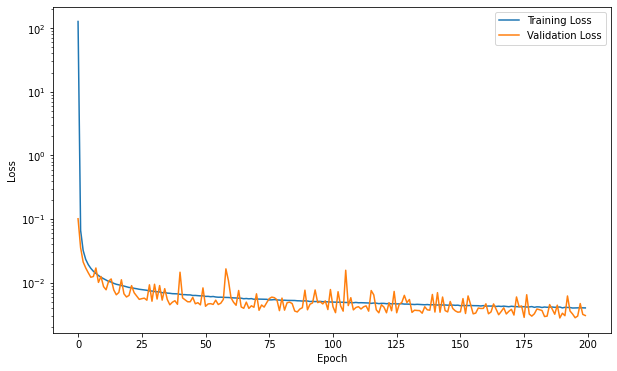

In [8]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist)

We see the spikes again... and the validation loss is lower than the training loss.

In [9]:
output = model1.predict(clusters_v)

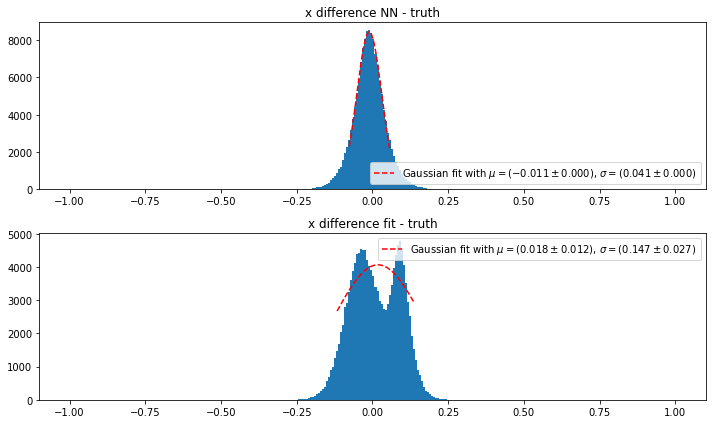

(array([-1.06265518e-02,  4.10065655e-02,  8.68346381e+02]),
 array([3.74572583e-04, 4.80907893e-04, 8.23685689e+00]),
 array([1.81492238e-02, 1.47273906e-01, 1.50082019e+03]),
 array([1.16207866e-02, 2.74487209e-02, 2.33705322e+02]))

In [10]:
mf.histo_output(output.T[0], veri_fit_data.T[0], veri_truth_data.T[0], name="x")

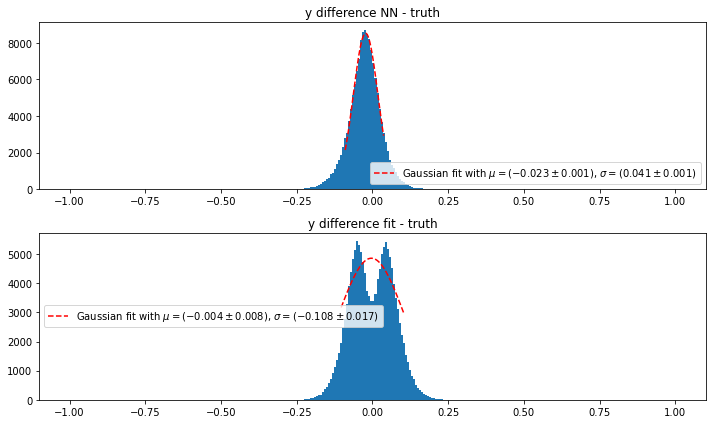

(array([-2.26077759e-02,  4.05501777e-02,  8.65992742e+02]),
 array([5.02248120e-04, 6.55280482e-04, 1.12906389e+01]),
 array([-3.59335380e-03, -1.07901939e-01,  1.31559350e+03]),
 array([7.84167892e-03, 1.66460001e-02, 1.64990425e+02]))

In [12]:
mf.histo_output(output.T[1], veri_fit_data.T[1], veri_truth_data.T[1], name="y")

In [ ]:
keras.models.save_model(model1, 'stage1model_lr0.00005')

<h2> summary </h2>

| (x/y) | $\mu$ | $\sigma$ |
| --- | --- | --- |
| simplest model $\alpha=0.005$ |0.035 / 0.040 | 0.054 / 0.044 |
| simplest model & standardization $\alpha=0.005$ | 0.047 / 0.048  | 0.044 / 0.045 |
| simplest model & standardization & $\alpha=0.001$, 50 epochs| 0.076 / 0.013  | 0.045 / 0.046 |
| simplest model & standardization & $\alpha=0.001$, 200 epochs| 0.014 / 0.034  | 0.042 / 0.043 |
| simplest model & standardization & $\alpha=0.0001$, 200 epochs| 0.010 / 0.011  | 0.040 / 0.038 |
| simplest model & standardization & $\alpha=0.01$, 50 epochs| divergence  | divergence |
| simplest model & standardization & $\alpha=0.00001$, 200 epochs| 0.00039 / 0.00893  | 0.045 / 0.046 |
| simplest model & standardization & $\alpha=0.00005$, 200 epochs| 0.011 / 0.023  | 0.041/ 0.041 |

One can see that this learning rate is still too high. I'll close the study on the learning rate for now and go for $\alpha=0.00001$.